In [6]:
import h5py
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf

import os
import sys
# sys.path.insert(1, os.path.join(sys.path[0], '..'))
os.chdir('..')

((228, 304, 3), <type 'numpy.ndarray'>, 0, 255, 89.039074522930136)


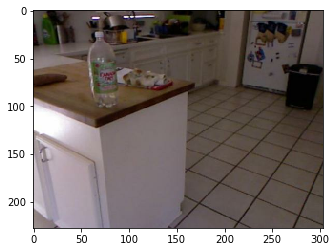

((228, 304, 3), <type 'numpy.ndarray'>, -128, 127, -38.960925477069871)


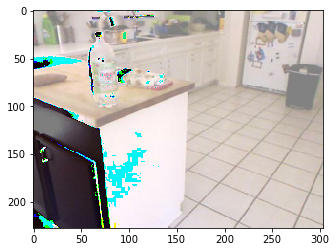

In [60]:
from dataset import DataSet
import dataset
import traceback
with tf.Graph().as_default():
    dataset = DataSet(8)
    images, depths, invalid_depths = dataset.csv_inputs('train.csv', target_size=[228, 304])
    sess = tf.Session()
    coord = tf.train.Coordinator()
    try:
        threads = tf.train.start_queue_runners(sess=sess, coord=coord)
        im1 = tf.cast(images[0], tf.int32)
        im2 = tf.subtract(im1, 128)
        ims, im1, im2  = sess.run([images, im1, im2])
        
        print(im1.shape, type(im1), np.min(im1), np.max(im1), np.mean(im1))
        plt.imshow(im1.astype(np.uint8))
        plt.show()
        print(im2.shape, type(im2), np.min(im2), np.max(im2), np.mean(im2))
        plt.figure()
        plt.imshow(im2.astype(np.uint8))
        plt.show()
    except Exception as e:
        coord.request_stop()
        traceback.print_exc()
    coord.request_stop()
    coord.join(threads)
    sess.close()

In [42]:
b = np.ones([2,3,3])*10
b

array([[[ 10.,  10.,  10.],
        [ 10.,  10.,  10.],
        [ 10.,  10.,  10.]],

       [[ 10.,  10.,  10.],
        [ 10.,  10.,  10.],
        [ 10.,  10.,  10.]]])

In [43]:
c = b - 5
c

array([[[ 5.,  5.,  5.],
        [ 5.,  5.,  5.],
        [ 5.,  5.,  5.]],

       [[ 5.,  5.,  5.],
        [ 5.,  5.,  5.],
        [ 5.,  5.,  5.]]])

In [38]:
print(np.mean(b), np.mean(c))

(0.59948083672664643, -8.0182774000705749e-17)


In [ ]:
# filename queue
filename_queue = tf.train.string_input_producer(['train.csv', 'val.csv', 'test.csv'])

In [ ]:
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

In [ ]:
record_defaults = []